## Testing and Debugging the BPASS isochrone at 10^9 years age.
In this BPASS isochrone and cluster plot, I go over the BPASS isochrone for 1 billion years age, solar metallicity, AKs=0.0, and distance of 1000 parsecs from Earth. From the isochrone and cluster, we discuss several plots such as the log_g frequency distribution of the isochrone, the color magnitude diagram (B-V vs M_V), and the current-mass luminosity relationship of the cluster.

For a sanity check, we can see that the primaries, secondaries, and single stars have phasees of 5 or of 101 or 110 (for the case of compact remnant primary from secondary star models). This is since we haven't identified neutron stars or black holes yet. Stars with phase of -99 exist, and those are the secondary stars that have already merged.

In [1]:
import spisea
from spisea import evolution, synthetic
import math
# Check if the evolution class works fine
import time
t1=time.time()
bps=evolution.BPASS()
iso1=synthetic.Isochrone_Binary(9.0, 0.0, 100,math.log10(1), mass_sampling=1, filepath='/g/lu/scratch/ryotainagaki/BPASS_iso_filesTimedIsolated/')

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:346: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1771: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = geta

Changing to logg=5.00 for T= 17875 logg=5.24
Changing to logg=5.00 for T= 21570 logg=5.64
Changing to logg=5.00 for T= 26930 logg=5.65
Changing to logg=5.00 for T= 24186 logg=5.42
Changing to logg=5.00 for T= 25963 logg=5.80
Changing to logg=5.00 for T= 26020 logg=5.81
Changing to logg=5.00 for T= 19593 logg=6.97
Changing to logg=5.00 for T= 24008 logg=6.91
Changing to logg=5.00 for T= 23626 logg=5.99
Changing to logg=5.00 for T= 26757 logg=5.79
Changing to logg=5.00 for T= 25848 logg=5.79
Changing to logg=5.00 for T= 19749 logg=5.03
Changing to logg=5.00 for T= 22982 logg=5.76
Changing to logg=5.00 for T= 25707 logg=5.88
Changing to logg=5.00 for T= 23984 logg=6.88
Changing to logg=5.00 for T= 22961 logg=5.92
Changing to logg=5.00 for T= 25553 logg=5.87
Changing to logg=5.00 for T= 24452 logg=5.99
Changing to logg=5.00 for T= 24377 logg=5.87
Changing to logg=5.00 for T= 23096 logg=5.56
Changing to logg=5.00 for T= 24306 logg=5.43
Changing to logg=5.00 for T= 21304 logg=5.48
Changing t

M =   1.700 Msun  T =  7133 K  m_ubv_U = 6.64
M =   1.700 Msun  T =  7133 K  m_ubv_U = 6.64
M =   2.300 Msun  T = 12334 K  m_ubv_U = 16.34
M =   3.500 Msun  T = 11070 K  m_ubv_U = 16.94
M =   2.000 Msun  T =  7250 K  m_ubv_U = 6.58
M =   2.500 Msun  T = 14449 K  m_ubv_U = 16.35
M =   2.500 Msun  T = 22891 K  m_ubv_U = 8.23
M =   6.000 Msun  T = 13610 K  m_ubv_U = 17.21
M =   3.000 Msun  T = 11485 K  m_ubv_U = 16.54
M =   5.000 Msun  T = 10994 K  m_ubv_U = 17.13
M =   3.200 Msun  T = 10973 K  m_ubv_U = 16.75
M =   4.500 Msun  T = 10909 K  m_ubv_U = 17.08
M =   1.700 Msun  T =  7246 K  m_ubv_U = 7.52
M =   3.000 Msun  T = 11434 K  m_ubv_U = 16.54
M =   2.000 Msun  T =  7250 K  m_ubv_U = 6.58
M =   1.600 Msun  T = 12828 K  m_ubv_U = 16.17
M =   2.100 Msun  T =  6694 K  m_ubv_U = 6.42
M =   2.100 Msun  T =  6638 K  m_ubv_U = 6.43
M =   0.501 Msun  T =   nan K  m_ubv_U =  nan
M =   0.316 Msun  T =   nan K  m_ubv_U =  nan
M =   0.631 Msun  T =  2739 K  m_ubv_U =  nan
M =   0.501 Msun  T =   

M =   2.880 Msun  T =  8640 K  m_ubv_B = 4.54
M =   3.150 Msun  T =  9845 K  m_ubv_B = 3.93
M =   0.850 Msun  T =  4905 K  m_ubv_B = 11.92
M =   0.300 Msun  T =   nan K  m_ubv_B =  nan
M =   1.800 Msun  T =  7808 K  m_ubv_B = 7.08
M =   1.120 Msun  T =   nan K  m_ubv_B =  nan
M =   1.680 Msun  T =  7616 K  m_ubv_B = 7.49
M =   1.470 Msun  T =  6978 K  m_ubv_B = 8.33
M =   3.700 Msun  T = 10955 K  m_ubv_B = 17.54
M =   3.700 Msun  T = 10955 K  m_ubv_B = 17.54
M =   4.000 Msun  T =  9868 K  m_ubv_B = 17.62
M =   2.100 Msun  T =  6590 K  m_ubv_B = 6.40
M =   2.300 Msun  T =  4923 K  m_ubv_B = 6.31
M =   3.200 Msun  T = 10997 K  m_ubv_B = 17.32
M =   1.700 Msun  T =  7213 K  m_ubv_B = 7.52
M =   2.000 Msun  T =  7152 K  m_ubv_B = 6.57
Starting filter: ubv,R   Elapsed time: 45.26 seconds
Starting synthetic photometry
Singles
M =   1.240 Msun  T =  6244 K  m_ubv_R = 8.62
Primaries
M =   1.600 Msun  T =  7037 K  m_ubv_R = 7.33
M =   2.500 Msun  T = 16006 K  m_ubv_R = 16.21
M =   6.000 Msun  T

As a sanity check, I would like to make sure thatk, for primary stars, we only have (from the isochrone) designated phase 5 stars ( anything that is not a compact remnant), white dwarves (101), and non-white dwarf compact remnants that are NEWSECMODS primaries (110). Also make sure that our secondary stars are non-compact-remnant, white dwarves, or are merged.

In [2]:
import numpy as np
np.all([(x==5 or x==101 or x==110) for x in iso1.primaries['phase']])

True

In [3]:
np.all([(x==5 or x==101) for x in iso1.singles['phase']])

True

In [4]:
np.all([(x==5 or x==101 or x==-99) for x in iso1.secondaries['phase']])

True

Find the maximum, mean, and median  values of logg (cgs) for primaries, single stars, and secondaries. 

In [5]:
import numpy as np
np.max(iso1.singles['logg'])

9.294869501162154

In [6]:
import numpy as np
np.max(iso1.primaries['logg'])

nan

In [7]:
np.max(np.nan_to_num(iso1.secondaries['logg']))

9.283702439639246

In [8]:
np.mean(iso1.singles['logg'])

5.738480715913404

In [9]:
np.mean((np.nan_to_num(iso1.secondaries['logg'])))

4.203033635403525

In [10]:
np.mean((np.nan_to_num(iso1.primaries['logg'])))

4.860696930888394

In [11]:
np.median(iso1.singles['logg'])

4.359189253980008

In [12]:
np.median(iso1.primaries['logg'])

nan

In [13]:
iso1.primaries['logg']

4.105267609959058
3.500806922037053
8.329799537345899
2.5859354633207263
4.350828873350758
9.23071353754886
8.151969042560621
8.290112143210417
9.280106678609133
3.7281376229671146
3.8529812282559623


Text(0.5, 0, 'logg in cgs')

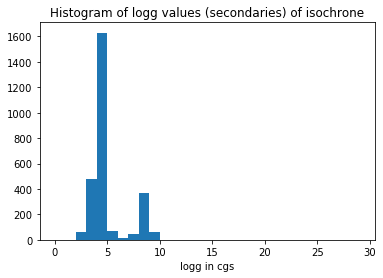

In [14]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (secondaries) of isochrone")
plt.hist(np.array([x for x in iso1.secondaries['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

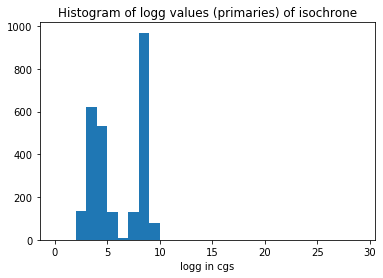

In [15]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (primaries) of isochrone")
plt.hist(np.array([x for x in iso1.primaries['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

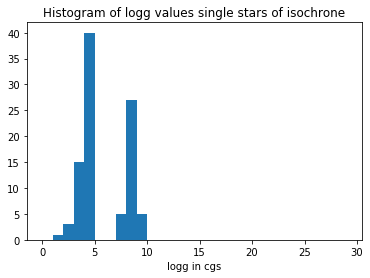

In [16]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values single stars of isochrone")
plt.hist(np.array([x for x in iso1.singles['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Now we examine the phase of the upper lefthand corner of the CMD, which could be full of WR stars.

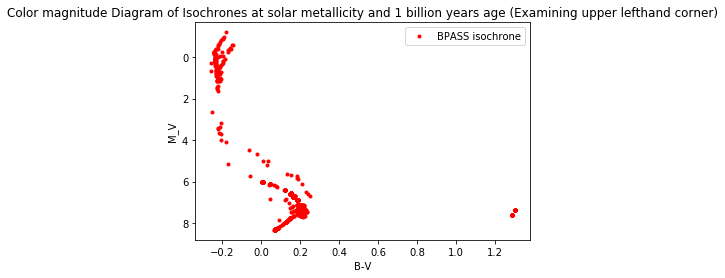

In [17]:
import matplotlib.pyplot as plt
indices1= np.where(iso1.singles['logg']>5)[0]
indices2= np.where(iso1.primaries['logg']>5)[0]
indices3= np.where(iso1.secondaries['logg']>5)[0]
plt.plot(iso1.primaries['m_ubv_B'][indices2]-iso1.primaries["m_ubv_V"][indices2], iso1.primaries["m_ubv_V"][indices2]-5*np.log10(100), "r.")
plt.plot(iso1.secondaries['m_ubv_B'][indices3]-iso1.secondaries["m_ubv_V"][indices3], iso1.secondaries["m_ubv_V"][indices3]-5*np.log10(100), "r.")
plt.plot(iso1.singles['m_ubv_B'][indices1]-iso1.singles["m_ubv_V"][indices1], iso1.singles["m_ubv_V"][indices1]-5*np.log10(100), "r.", label="BPASS isochrone")
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 1 billion years age (Examining upper lefthand corner)")
plt.gca().invert_yaxis()
plt.legend()

In [18]:
indices2= np.where((iso1.primaries['logg']>5) & (iso1.primaries['m_ubv_B']-iso1.primaries['m_ubv_V']>-0.4) & (iso1.primaries['m_ubv_B']-iso1.primaries['m_ubv_V']<-0.2))[0]

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


In [19]:
np.unique(iso1.primaries[indices2]['phase'])

5.0


In [20]:
indices2= np.where((iso1.primaries['m_ubv_B']-iso1.primaries['m_ubv_V']>1.2) & (iso1.primaries['m_ubv_B']-iso1.primaries['m_ubv_V']<1.5))[0]

In [21]:
indices2

array([449])

In [22]:
np.unique(iso1.primaries['phase'][indices2])

5.0


In [23]:
iso1.primaries[indices2]

mass,log_a,L,Teff,R,logg,isWR,mass_current,phase,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,,W,K,m,,,solMass,,,,,,,
float64,float64,float64,float64,float64,float64,bool,float64,float64,int64,float64,float64,float64,float64,float64
0.3,-0.7390704086880291,1.4390037612938779e+25,3671.7237611356545,333334422.4131993,4.778454094998249,False,0.50439,5.0,1,17.02443685121329,14.641716058852237,16.0105881500427,13.841797062109691,12.499640003022018


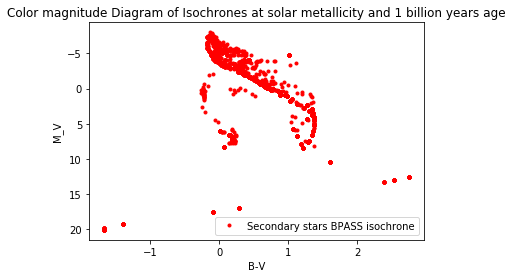

In [24]:
import matplotlib.pyplot as plt
plt.plot(iso1.secondaries['m_ubv_B']-iso1.secondaries["m_ubv_V"], iso1.secondaries["m_ubv_V"]-5*np.log10(100), "r.", label="Secondary stars BPASS isochrone")
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 1 billion years age")
plt.gca().invert_yaxis()
plt.legend()

In [25]:
iso1.secondaries[np.where((iso1.secondaries['m_ubv_V']>30) & ((iso1.secondaries['m_ubv_B']-iso1.secondaries['m_ubv_V'])<-1))[0]]

mass,log_a,L,Teff,R,logg,isWR,mass_current,phase,merged,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,,W,K,m,,,solMass,,,,,,,,
float64,float64,float64,float64,float64,float64,bool,float64,float64,bool,int64,float64,float64,float64,float64,float64
0.12,0.46526459131197084,9.525371641748255e+21,692.4525198305719,240997203.6386495,4.438068873350758,False,0.12,5.0,False,1,31.642317827988748,30.070345010609906,28.407698432701793,25.56687074093737,19.659917675146843
0.12,0.8652645913119708,9.525371641748255e+21,692.4525198305719,240997203.6386495,4.438068873350758,False,0.12,5.0,False,1,31.642317827988748,30.070345010609906,28.407698432701793,25.56687074093737,19.659917675146843
0.12,0.19859759131197086,9.525371641748255e+21,692.4525198305719,240997203.6386495,4.438068873350758,False,0.12,5.0,False,1,31.642317827988748,30.070345010609906,28.407698432701793,25.56687074093737,19.659917675146843
0.12,-1.1347354086880292,9.525371641748255e+21,692.4525198305719,240997203.6386495,4.438068873350758,False,0.12,5.0,False,1,31.642317827988748,30.070345010609906,28.407698432701793,25.56687074093737,19.659917675146843
0.12,0.06526459131197093,9.525371641748255e+21,692.4525198305719,240997203.6386495,4.438068873350758,False,0.12,5.0,False,1,31.642317827988748,30.070345010609906,28.407698432701793,25.56687074093737,19.659917675146843
0.12,0.5985975913119708,9.525371641748255e+21,692.4525198305719,240997203.6386495,4.438068873350758,False,0.12,5.0,False,1,31.642317827988748,30.070345010609906,28.407698432701793,25.56687074093737,19.659917675146843
0.12,0.3319315913119709,9.525371641748255e+21,692.4525198305719,240997203.6386495,4.438068873350758,False,0.12,5.0,False,1,31.642317827988748,30.070345010609906,28.407698432701793,25.56687074093737,19.659917675146843
0.12,0.9985975913119707,9.525371641748255e+21,692.4525198305719,240997203.6386495,4.438068873350758,False,0.12,5.0,False,1,31.642317827988748,30.070345010609906,28.407698432701793,25.56687074093737,19.659917675146843


Hmm, I think those are stars that are going to be white dwarves very soon or may unintentionally be brown dwarves. At least according to HOKI's criterion for what is a white dwarf or not. At the very least, at least the stars we just saw were low mass stars so they should be **LOW** on the CMD

In [26]:
iso2=synthetic.IsochronePhot(9.0, 0.0, 100, math.log(1), recomp=True) # New MIST v.1 isochrone for same metallicity

Isochrone generation took 88.072433 s.
Making photometry for isochrone: log(t) = 9.00  AKs = 0.00  dist = 100
     Starting at:  2020-12-14 16:06:20.673991   Usually takes ~5 minutes
Starting filter: ubv,U   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.106 Msun  T =  2909 K  m_ubv_U = 23.81
M =   1.215 Msun  T =  6415 K  m_ubv_U = 9.34
M =   2.038 Msun  T =  7816 K  m_ubv_U = 6.07
M =   2.055 Msun  T =  4955 K  m_ubv_U = 7.95
M =   2.071 Msun  T =  4749 K  m_ubv_U = 7.60
M =   2.275 Msun  T =  4576 K  m_ubv_U = 7.10
M =   2.287 Msun  T =  3677 K  m_ubv_U = 7.20
M =   2.287 Msun  T =  3493 K  m_ubv_U = 7.28
M =   2.287 Msun  T =  3478 K  m_ubv_U = 7.29
M =   2.288 Msun  T =  3244 K  m_ubv_U = 7.38
M =   2.288 Msun  T =  3188 K  m_ubv_U = 7.60
M =   2.288 Msun  T = 29326 K  m_ubv_U = 1.56
M =   2.288 Msun  T = 134813 K  m_ubv_U = 6.28
Starting filter: ubv,B   Elapsed time: 3.84 seconds
Starting synthetic photometry
M =   0.106 Msun  T =  2909 K  m_ubv_B = 22.37
M =   

Looking at the distribution of logg values. for the stars in the MISTv.1 isochrone.

In [27]:
np.max(iso2.points['logg'])

7.649638166828848

(array([455., 107., 231., 202., 161.,  44.,  28.,  61.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Patch objects>)

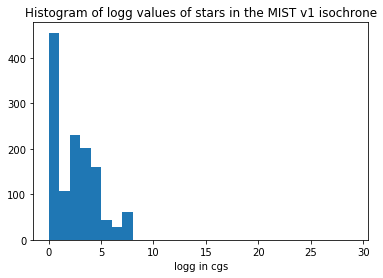

In [28]:
import matplotlib.pyplot as plt
plt.xlabel("logg in cgs")
plt.title("Histogram of logg values of stars in the MIST v1 isochrone")
plt.hist(np.array([x for x in iso2.points['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))

In [29]:
np.median(iso2.points['logg'])

2.3813767318010193

In [30]:
np.mean(iso2.points['logg'])

2.5137952710880946

In [31]:
from spisea import imf
from spisea.imf import imf, multiplicity
from spisea import ifmr


Make the clusters corresponding to the binary star isochrone and the MISTv.1 isochrone

In [32]:
clus_1=synthetic.Binary_Cluster(iso1, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()), 2000, ifmr=ifmr.IFMR_Spera15())
clus_2=synthetic.ResolvedCluster(iso2, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()), 2000, ifmr=ifmr.IFMR_Spera15())

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(super(), op)(other)


Found 33 companions out of stellar mass range


Now let's visualize the isochrone we have created so far with a color magnitude diagram. There we can see the end of main sequence and perhaps the M type

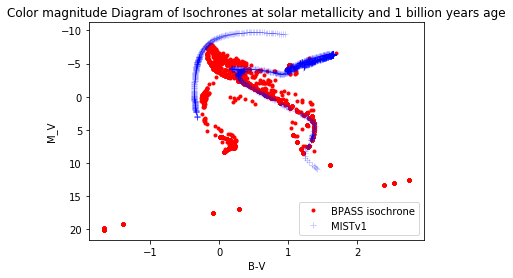

In [33]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"], iso1.primaries["m_ubv_V"]-5*np.log10(100), "r.")
plt.plot(iso1.secondaries['m_ubv_B']-iso1.secondaries["m_ubv_V"], iso1.secondaries["m_ubv_V"]-5*np.log10(100), "r.")
plt.plot(iso1.singles['m_ubv_B']-iso1.singles["m_ubv_V"], iso1.singles["m_ubv_V"]-5*np.log10(100), "r.", label="BPASS isochrone")
plt.plot(iso2.points['m_ubv_B']-iso2.points["m_ubv_V"], iso2.points["m_ubv_V"]-5*np.log10(100), "b+", label="MISTv1", alpha = 0.2)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 1 billion years age")
plt.gca().invert_yaxis()
plt.legend()

We do have several outliers but otherwise the pattern does not seem too terribly off from the MISTv.1 isochrone's shape. Now I look at the primary stars and see if there are any problems caused.

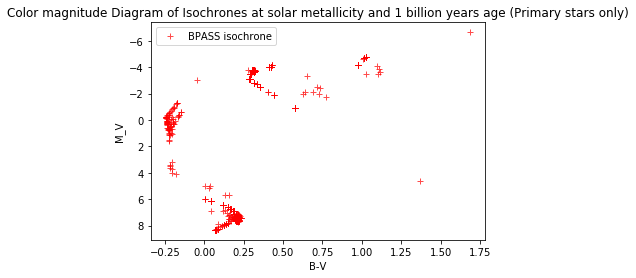

In [34]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"], iso1.primaries["m_ubv_V"]-5*np.log10(100), "r+",  label="BPASS isochrone", alpha =0.7)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 1 billion years age (Primary stars only)")
plt.gca().invert_yaxis()
plt.legend()

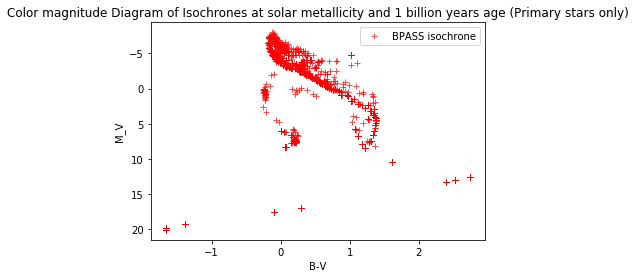

In [35]:
import matplotlib.pyplot as plt
plt.plot(iso1.secondaries['m_ubv_B']-iso1.secondaries["m_ubv_V"], iso1.secondaries["m_ubv_V"]-5*np.log10(100), "r+",  label="BPASS isochrone", alpha =0.7)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 1 billion years age (Primary stars only)")
plt.gca().invert_yaxis()
plt.legend()

Where are some of the goofy outliers coming from?

In [36]:
iso1.secondaries[np.where(iso1.secondaries["m_ubv_V"]-5*np.log10(100)>20.0)[0]]

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


mass,log_a,L,Teff,R,logg,isWR,mass_current,phase,merged,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,,W,K,m,,,solMass,,,,,,,,
float64,float64,float64,float64,float64,float64,bool,float64,float64,bool,int64,float64,float64,float64,float64,float64
0.12,0.46526459131197084,9.525371641748255e+21,692.4525198305719,240997203.6386495,4.438068873350758,False,0.12,5.0,False,1,31.642317827988748,30.070345010609906,28.407698432701793,25.56687074093737,19.659917675146843
0.12,0.8652645913119708,9.525371641748255e+21,692.4525198305719,240997203.6386495,4.438068873350758,False,0.12,5.0,False,1,31.642317827988748,30.070345010609906,28.407698432701793,25.56687074093737,19.659917675146843
0.12,0.19859759131197086,9.525371641748255e+21,692.4525198305719,240997203.6386495,4.438068873350758,False,0.12,5.0,False,1,31.642317827988748,30.070345010609906,28.407698432701793,25.56687074093737,19.659917675146843
0.12,-1.1347354086880292,9.525371641748255e+21,692.4525198305719,240997203.6386495,4.438068873350758,False,0.12,5.0,False,1,31.642317827988748,30.070345010609906,28.407698432701793,25.56687074093737,19.659917675146843
0.12,0.06526459131197093,9.525371641748255e+21,692.4525198305719,240997203.6386495,4.438068873350758,False,0.12,5.0,False,1,31.642317827988748,30.070345010609906,28.407698432701793,25.56687074093737,19.659917675146843
0.12,0.5985975913119708,9.525371641748255e+21,692.4525198305719,240997203.6386495,4.438068873350758,False,0.12,5.0,False,1,31.642317827988748,30.070345010609906,28.407698432701793,25.56687074093737,19.659917675146843
0.12,0.3319315913119709,9.525371641748255e+21,692.4525198305719,240997203.6386495,4.438068873350758,False,0.12,5.0,False,1,31.642317827988748,30.070345010609906,28.407698432701793,25.56687074093737,19.659917675146843
0.12,0.9985975913119707,9.525371641748255e+21,692.4525198305719,240997203.6386495,4.438068873350758,False,0.12,5.0,False,1,31.642317827988748,30.070345010609906,28.407698432701793,25.56687074093737,19.659917675146843


In [37]:
issue = iso1.secondaries[np.where(iso1.secondaries["m_ubv_V"]-5*np.log10(100)>20.0)[0]]

In [38]:
np.unique(issue['mass'])

0.12


In [39]:
np.unique(issue['phase'])

5.0


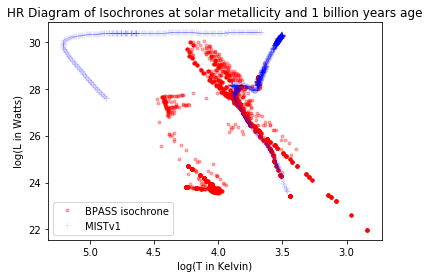

In [40]:
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['Teff']), np.log10(iso1.primaries["L"]), "r.", alpha =0.3)
plt.plot(np.log10(iso1.secondaries['Teff']), np.log10(iso1.secondaries["L"]), "r.", alpha =0.3)
plt.plot(np.log10(iso1.singles['Teff']), np.log10(iso1.singles["L"]), "r.", label="BPASS isochrone", alpha =0.3)
plt.plot(np.log10(iso2.points['Teff']), np.log10(iso2.points["L"]), "b+", label="MISTv1", alpha =0.1)
plt.xlabel("log(T in Kelvin)")
plt.ylabel("log(L in Watts)")
plt.title("HR Diagram of Isochrones at solar metallicity and 1 billion years age")
plt.gca().invert_xaxis()
plt.legend()
# Rough pattern seems to fit. What's that line?

A good sign here is that there are plenty of compact remnant (that means good number of stars have gone through their main-sequence and post-main sequence). I also notice stars turning to the red giant branch. This is going to be really important when we decide to use the clusters as reference for finding ages of actual star clusters.

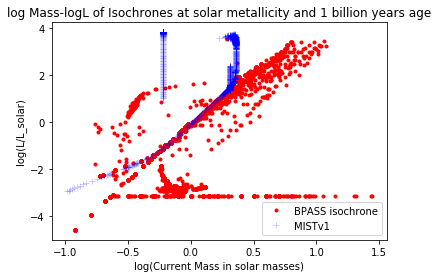

In [41]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['mass_current']), np.log10(iso1.primaries["L"]/cs.L_sun), "r.")
plt.plot(np.log10(iso1.secondaries['mass_current']), np.log10(iso1.secondaries["L"]/cs.L_sun), "r.")
plt.plot(np.log10(iso1.singles['mass_current']), np.log10(iso1.singles["L"]/cs.L_sun), "r.", label="BPASS isochrone")
plt.plot(np.log10(iso2.points['mass_current']), np.log10(iso2.points["L"]/cs.L_sun), "b+", label="MISTv1", alpha =0.2)
plt.xlabel("log(Current Mass in solar masses)")
plt.ylabel("log(L/L_solar)")
plt.title("log Mass-logL of Isochrones at solar metallicity and 1 billion years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Which table is causing that line segment at around log10(L/L_sun)=-3?
Let's find out.

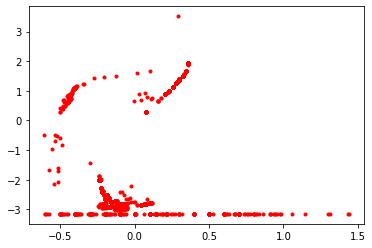

In [42]:
from astropy import constants as cs
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['mass_current']), np.log10(iso1.primaries["L"]/cs.L_sun), "r.", label="BPASS isochrone")

Which type of secondary star is it that is causing this strange pattern?

In [43]:
bad_line = iso1.primaries[np.where((np.log10(iso1.primaries["L"]/cs.L_sun)>-3.30) & (np.log10(iso1.primaries["L"]/cs.L_sun)<-3.10))[0]]

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in greater
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in less
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [44]:
bad_line

mass,log_a,L,Teff,R,logg,isWR,mass_current,phase,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,,W,K,m,,,solMass,,,,,,,
float64,float64,float64,float64,float64,float64,bool,float64,float64,int64,float64,float64,float64,float64,float64
0.794328,0.35470859131197097,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.338067498968938,False,0.794328,110.0,4,nan,nan,nan,nan,nan
1.25893,0.504210591311971,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.538069210104485,False,1.25893,110.0,4,nan,nan,nan,nan,nan
2.51189,0.6303145913119708,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.8398356118570485,False,2.522133,110.0,4,nan,nan,nan,nan,nan
6.30957,0.676568591311971,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,5.2398806024725575,False,6.335968,110.0,4,nan,nan,nan,nan,nan
5.01187,-1.892630508688029,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,5.192737588817441,False,5.684208,110.0,3,nan,nan,nan,nan,nan
1.0,0.628848591311971,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.438067627303133,False,1.0,110.0,4,nan,nan,nan,nan,nan
0.501187,-0.8165464086880292,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.150973285237059,False,0.5163042,110.0,4,nan,nan,nan,nan,nan
1.0,0.9305035913119708,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.438067627303133,False,1.0,110.0,4,nan,nan,nan,nan,nan


What sorts of characteristics (logg, Teff, L) can be causing it? Let's find out

In [45]:
np.unique(bad_line['L'])

2.6668705105418817e+23


In [46]:
np.unique(bad_line['Teff'])

2738.7349246249955


In [47]:
np.unique(bad_line['logg'])

3.8380682442795133
3.848991568402669
3.862687955573788
3.9380679486460686
3.949071219388386
3.95045154147022
3.9519118377249005
3.9618896339800544
3.9727241454707474
3.985484415173413
3.9914786178351043


In [48]:
np.unique(bad_line['mass'])

0.251189
0.316228
0.398107
0.501187
0.630957
0.794328
1.0
1.25893
1.4
1.99526
2.51189


In [49]:
np.unique(bad_line['phase'])

110.0


**It turns out that the line was caused by some compact remnants that were lingering around from the NEWSECMODS. In future versions of the stellar evolution model, I may obtain an additional program from the BPASS creators to match the types of compact remnants from the NEWSECMODS.**

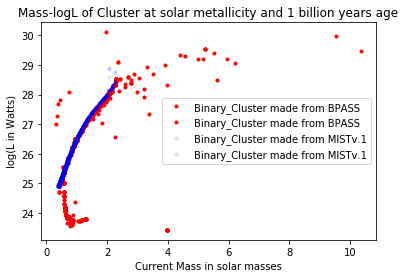

In [50]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
plt.plot((clus_1.star_systems['mass_current']), np.log10(clus_1.star_systems["L"]), "r.", label="Binary_Cluster made from BPASS", alpha =1)
plt.plot((clus_1.companions['mass_current']), np.log10(clus_1.companions["L"]), "r.", label="Binary_Cluster made from BPASS", alpha = 1)
plt.plot((clus_2.star_systems['mass_current']), np.log10(clus_2.star_systems["L"]), "b.", label="Binary_Cluster made from MISTv.1", alpha =0.1)
plt.plot((clus_2.companions['mass_current']), np.log10(clus_2.companions["L"]), "b.", label="Binary_Cluster made from MISTv.1", alpha = 0.1)
plt.xlabel("Current Mass in solar masses")
plt.ylabel("log(L in Watts)")
plt.title("Mass-logL of Cluster at solar metallicity and 1 billion years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Where is that hook coming from?

In [51]:
np.unique(iso1.primaries[np.where(np.log10(iso1.primaries["L"])<=25)]['phase'])

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less_equal
  result = getattr(super(), op)(other)


101.0
110.0


In [52]:
len(iso1.primaries[np.where((np.log10(iso1.primaries["L"])<=25) & (iso1.primaries["phase"]==110))])

301

In [53]:
len(iso1.primaries[np.where((np.log10(iso1.primaries["L"])<=25) & (iso1.primaries["phase"]==101))])

1173

OK. It makes sense that our compact remnants are causing this. (Remember, there really is no significant fusion in the insides of neutron stars or white dwarves.

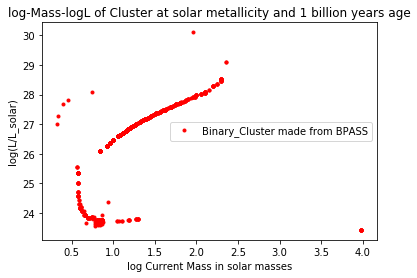

In [54]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
from astropy import units as u
import matplotlib.pyplot as plt
plt.plot(clus_1.star_systems['mass_current'], np.log10(clus_1.star_systems["L"]), "r.", label="Binary_Cluster made from BPASS", alpha =1)
plt.xlabel("log Current Mass in solar masses")
plt.ylabel("log(L/L_solar)")
plt.title("log-Mass-logL of Cluster at solar metallicity and 1 billion years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

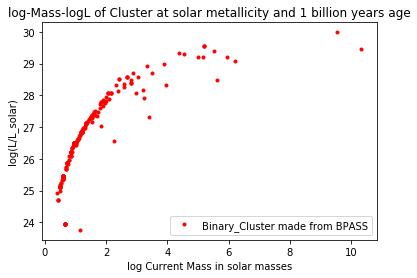

In [55]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
from astropy import units as u
import matplotlib.pyplot as plt
plt.plot(clus_1.companions['mass_current'], np.log10(clus_1.companions["L"]), "r.", label="Binary_Cluster made from BPASS", alpha =1)
plt.xlabel("log Current Mass in solar masses")
plt.ylabel("log(L/L_solar)")
plt.title("log-Mass-logL of Cluster at solar metallicity and 1 billion years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Aha, it looks like the companions are causing this! and these are probably the 110 and 101 phased stars. Otherwise I like the alignment

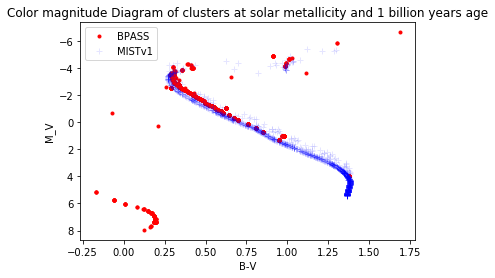

In [56]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(clus_1.star_systems['m_ubv_B']-clus_1.star_systems["m_ubv_V"], clus_1.star_systems["m_ubv_V"]-5*np.log10(100), "r.",label="BPASS")
plt.plot(clus_2.star_systems['m_ubv_B']-clus_2.star_systems["m_ubv_V"], clus_2.star_systems["m_ubv_V"]-5*np.log10(100), "b+", label="MISTv1", alpha=0.1)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of clusters at solar metallicity and 1 billion years age")
plt.gca().invert_yaxis()
plt.legend()

In [57]:
clus_1.star_systems[np.where(clus_1.star_systems["m_ubv_V"]==0)]

mass,systemMass,Teff,L,logg,isWR,mass_current,phase,metallicity,isMultiple,merged,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,,K,W,,,solMass,,,,,,,,,
float64,float64,float64,float64,float64,bool,float64,float64,float64,bool,bool,float64,float64,float64,float64,float64


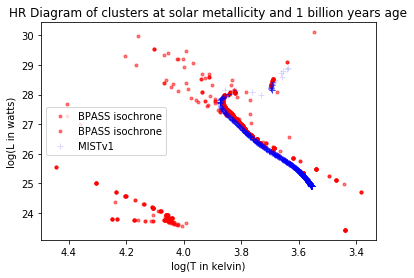

In [58]:
import matplotlib.pyplot as plt
plt.plot(np.log10(clus_1.companions['Teff']), np.log10(clus_1.companions["L"]), "r.",label="BPASS isochrone", alpha=0.5)
plt.plot(np.log10(clus_2.companions['Teff']), np.log10(clus_2.companions["L"]), "b+", alpha=0.15)
plt.plot(np.log10(clus_1.star_systems['Teff']), np.log10(clus_1.star_systems["L"]), "r.",label="BPASS isochrone", alpha=0.5)
plt.plot(np.log10(clus_2.star_systems['Teff']), np.log10(clus_2.star_systems["L"]), "b+", label="MISTv1", alpha=0.15)
plt.xlabel("log(T in kelvin)")
plt.ylabel("log(L in watts)")
plt.title("HR Diagram of clusters at solar metallicity and 1 billion years age")
plt.gca().invert_xaxis()
plt.legend()

Looking at which stars are the white dwarves?

In [59]:
import numpy as np
np.where(clus_1.star_systems['phase']==101.0)[0]

array([   2,    4,    7,    9,   10,   11,   14,   17,   18,   19,   23,
         24,   25,   28,   29,   30,   36,   38,   40,   44,   46,   47,
         48,   49,   50,   51,   52,   57,   60,   63,   64,   65,   67,
         72,   75,   77,   83,   84,   86,   89,   90,   92,   93,   97,
         98,   99,  101,  102,  106,  108,  110,  111,  115,  117,  118,
        119,  120,  121,  123,  125,  127,  128,  135,  137,  145,  148,
        149,  151,  153,  154,  157,  158,  160,  166,  169,  170,  174,
        176,  177,  178,  179,  181,  182,  187,  189,  199,  202,  207,
        208,  211,  214,  216,  217,  222,  269,  289,  340,  349,  376,
        421,  424,  427,  433,  436,  521,  566,  634,  700,  719,  734,
        739,  760,  813,  826,  879,  905, 1071, 1085, 1098, 1135, 1148,
       1152, 1192, 1206, 1223, 1253, 1270, 1343, 1393, 1430, 1436, 1451,
       1452, 1478, 1481, 1493, 1504, 1514, 1515, 1572, 1575, 1597, 1604,
       1611, 1688, 1695, 1761, 1772, 1784, 1799, 18

Black Holes?

In [60]:
np.where(clus_1.star_systems['phase']==103.0)[0]

array([], dtype=int64)

In [61]:
np.where(clus_1.star_systems['phase']==102.0)[0]

array([], dtype=int64)

In [62]:
clus_1.star_systems['systemMass'].sum()

1911.8762413391783

In [63]:
clus_2.star_systems['systemMass'].sum()

1998.0567350930905